## Základní příklady Pandas

Tento notebook vás provede některými velmi základními koncepty Pandas. Začneme importem typických knihoven pro datovou vědu:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Série

Série je jako seznam nebo jednorozměrné pole, ale s indexem. Všechny operace jsou zarovnány podle indexu.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Jedním z častých využití sérií jsou **časové řady**. V časových řadách má index speciální strukturu – obvykle jde o rozsah dat nebo časových údajů. Takový index můžeme vytvořit pomocí `pd.date_range`.

Představme si, že máme sérii, která ukazuje množství produktu zakoupeného každý den, a víme, že každou neděli si také musíme vzít jeden kus pro sebe. Zde je, jak to modelovat pomocí sérií:


Length of index is 366


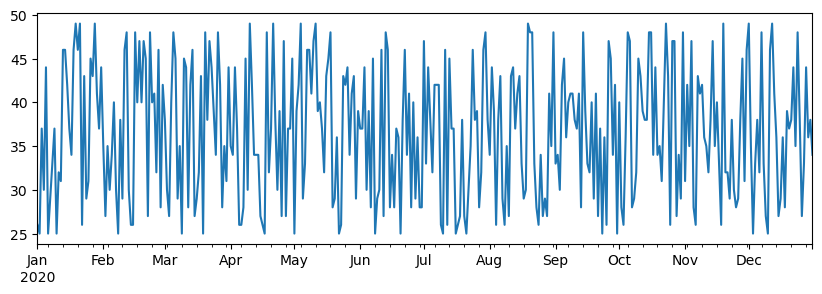

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Jak můžete vidět, máme zde problémy, protože ve týdenní sérii jsou nezmíněné dny považovány za chybějící (`NaN`), a přidání `NaN` k číslu nám dá `NaN`. Abychom získali správný výsledek, musíme při sčítání sérií specifikovat `fill_value`:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


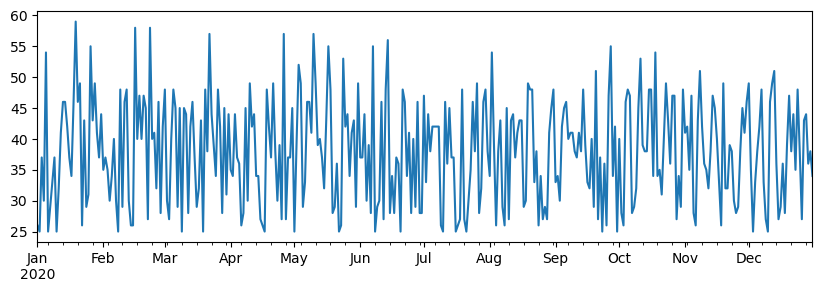

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

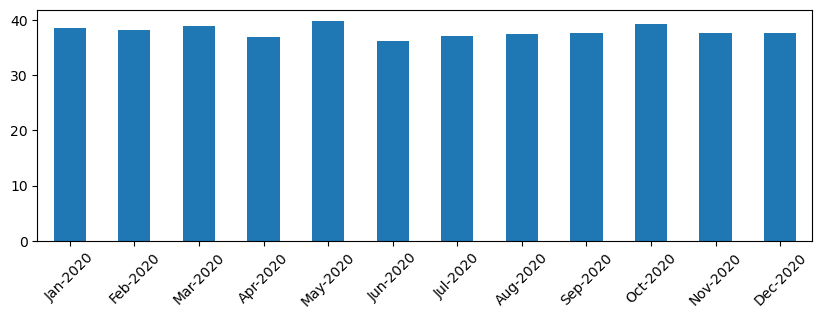

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame je v podstatě kolekce sérií se stejným indexem. Můžeme spojit několik sérií dohromady do jednoho DataFrame. Vzhledem k sériím `a` a `b` definovaným výše:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Můžeme také použít Series jako sloupce a specifikovat názvy sloupců pomocí slovníku:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Stejný výsledek lze dosáhnout transpozicí (a následným přejmenováním sloupců, aby odpovídaly předchozímu příkladu):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Výběr sloupců** z DataFrame lze provést takto:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Výběr řádků** na základě výrazu filtru:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Způsob, jakým to funguje, je, že výraz `df['A']<5` vrací booleovskou sérii, která označuje, zda je výraz `True` nebo `False` pro každý prvek série. Když je série použita jako index, vrací podmnožinu řádků v DataFrame. Proto není možné použít libovolný booleovský výraz v Pythonu, například psaní `df[df['A']>5 and df['A']<7]` by bylo nesprávné. Místo toho byste měli použít speciální operaci `&` na booleovské sérii:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Vytváření nových vypočitatelných sloupců**. Můžeme snadno vytvořit nové vypočitatelné sloupce pro náš DataFrame pomocí intuitivních výrazů. Níže uvedený kód vypočítává odchylku A od jeho průměrné hodnoty.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Co se ve skutečnosti děje, je to, že počítáme řadu a poté tuto řadu přiřazujeme na levou stranu, čímž vytváříme další sloupec.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Výběr řádků na základě čísel** lze provést pomocí konstrukce `iloc`. Například, pro výběr prvních 5 řádků z DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Seskupování** se často používá k získání výsledku podobného *kontingenčním tabulkám* v Excelu. Předpokládejme, že chceme vypočítat průměrnou hodnotu sloupce `A` pro každé dané číslo `LenB`. Poté můžeme seskupit náš DataFrame podle `LenB` a zavolat `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Pokud potřebujeme vypočítat průměr a počet prvků ve skupině, můžeme použít složitější funkci `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Tisk a vykreslování

Datoví vědci často potřebují prozkoumat data, a proto je důležité umět je vizualizovat. Když je DataFrame velký, často chceme jen ověřit, že vše děláme správně, tím, že si vytiskneme prvních pár řádků. To lze provést pomocí volání `df.head()`. Pokud to spouštíte z Jupyter Notebooku, DataFrame se zobrazí v pěkné tabulární podobě.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Už jsme viděli použití funkce `plot` k vizualizaci některých sloupců. I když je `plot` velmi užitečný pro mnoho úkolů a podporuje různé typy grafů pomocí parametru `kind=`, vždy můžete použít knihovnu `matplotlib` k vytvoření něčeho složitějšího. Vizualizaci dat se budeme podrobně věnovat v samostatných lekcích kurzu.


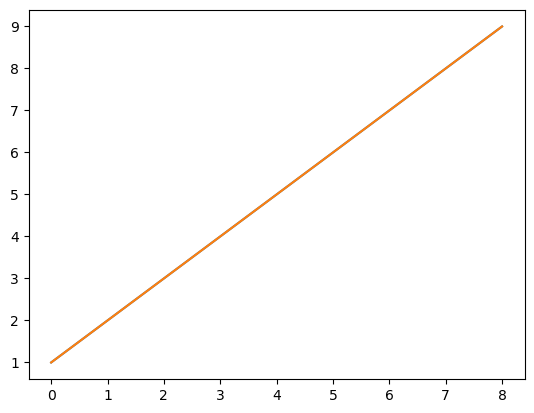

In [61]:
df['A'].plot()
plt.show()

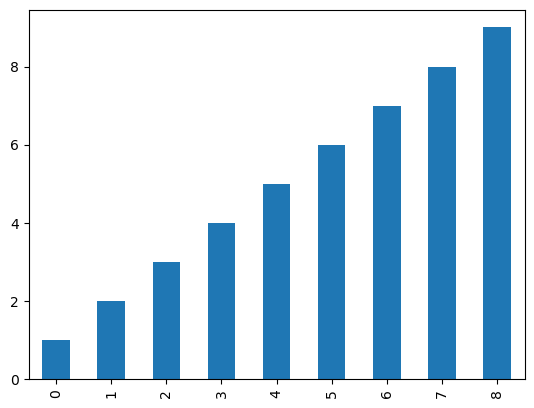

In [63]:
df['A'].plot(kind='bar')
plt.show()

Tento přehled pokrývá nejdůležitější koncepty Pandas, nicméně knihovna je velmi bohatá a možnosti jejího využití jsou prakticky neomezené! Pojďme nyní využít tyto znalosti k řešení konkrétního problému.



---

**Prohlášení**:  
Tento dokument byl přeložen pomocí služby pro automatický překlad [Co-op Translator](https://github.com/Azure/co-op-translator). Ačkoli se snažíme o přesnost, mějte prosím na paměti, že automatické překlady mohou obsahovat chyby nebo nepřesnosti. Původní dokument v jeho původním jazyce by měl být považován za autoritativní zdroj. Pro důležité informace doporučujeme profesionální lidský překlad. Neodpovídáme za žádná nedorozumění nebo nesprávné interpretace vyplývající z použití tohoto překladu.
